# Introduction to Statistics with Python






![img](https://files.realpython.com/media/Descriptive-Statistics-in-Python_Watermarked.fec81e9a41f9.jpg)

Since data might come from many sources, with different nomenclature depending on the discipline, it isn't a fool idea to summarize some concepts before going deeper:

Main difference between statisticians and data scientists is that the the former estimate and the latter measure. This explains the approach of statistics versus data science or business.

## Estimates of Location

A central tendency or location is a central or typical value for a probability distribution. Dispersion and central tendency are the often characterized properties of distributions. Sometimes data should be transformed or normalized, where the n-dimensions of data is also important. Following is presented the most common metrics.

### Mean

Most basic estimate (or average value). The mean is the sum of all values divided by the number of values. Note that $\bar{x}$ ("x-bar") represents the mean of a sample from a population.

$$ \mathrm{Mean} =  \bar{x} = \frac{\sum_{i=1}^{n}x_{i}}{n} $$ use ``mean()`` in Python

Where in Statistics $n$ is capitalized if it is reffering to a population, otherwise if it refers to a sample.




A variation of the mean is the trimmed mean, which it is obtained by dropping a fixed number of sorted values at each end and then taking the average of the reaminings. This eliminates the influence of extreme values.

$$\mathrm{Trimmed \hspace{1mm}mean} = \frac{\sum_{i=p + 1}^{n -p}x_{i}}{n-2p}$$

use ``trim_mean()``


Another type of mean is the weighted mean, which multiplies each data value $x_i$ by a user-specified weight $w_i$ and dividing their sum by the sum of the weights.

$$ \mathrm{Weighted \hspace{1mm}mean} = \frac{\sum_{i=i}^{n}x_{i}w_{i}}{\sum_{i=1}^{n}w_{i}} $$

The motivation for its use if that there are some values more variable than others, thus highly variable observations are given a lower weight (e.g. f we are taking the averagefrom  multiple  sensors  and  one  of  the  sensors  is  less  accurate,  then  we  might down weight the data from that sensor). Also, the  data  collected  does  not  equally  represent  the  different  groups  that  we  are interested  in  measuring, whether they are overrepresented or underrepresented.

### Median

The median is the middle number on a sorted list of the data. It only depends on the values in the center of the sorted data ̣ - and knowing that the mean is much more sensitive to the data - it could be a better metric for location (e.g. salaries from a group of people in which exists a rich one, hence the median would be more representative). Use ``median()``

Again, it is possible to use a weighted median: Each data value has an associated weight, so the weighted median is a value such that the sum of the weights is equal for the lower and upper halves of the sorted list. Like the median, the weighted median is robust to outliers.

If you have ordered set [2, 6, 6, 12, 17, 25 ,32], the median is 12 and the mean is 14.28. If you replace 32 with + ∞, the median stays the same (12), but the mean becomes infinite.

__Outliers__

An outlier is any value that is very distant from the other values in a data set (which doesn't necessarily mean that it is invalid/erroneous). The median is not the only robust estimate of location. A trimmed mean is commonly used (trimmed bottom and top 10 %) for providing protection against outliers, it can be thought of as a compromise between the median and the mean. 

Robust statistics are statistics with good performance for data drawn from a wide range of non-normally distributed probability distributions. 

This chapter is based on the book "[Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python](https://www.oreilly.com/library/view/practical-statistics-for/9781492072935/)". Datasets and code will be retrieved from the public git repository (https://github.com/gedeck/practical-statistics-for-data-scientists)


First of all, we will import the Python packages

In [4]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from scipy import stats
from statsmodels import robust
import statsmodels.api as sm
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('seaborn')

And the data sets from the git repository


In [7]:
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv"

state = pd.read_csv(url, error_bad_lines = True)

In [8]:
print(state.head(10))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE
8      Florida    18801310          5.8           FL
9      Georgia     9687653          5.7           GA


To compute the mean and median, we use the pandas method of the data frame

In [9]:
state['Population'].mean()
#print(state['Population'].mean())

6162876.3

In [12]:
trim_mean(state['Population'], 0.1)

4783697.125

In [13]:
state['Population'].median()

4436369.5

To compute the average murder rate for the country, it is necessary a weighted mean or median to account for different populations in the states. The `wquantiles` package enable us to do it:

The weighted mean is

In [14]:
np.average(state['Murder.Rate'], weights = state['Population'])

4.445833981123393

And the weighted median

In [13]:
wquantiles.median(state['Murder.Rate'], weights = state['Population'])

4.4

Which are practically equals

## Estimates of variability

A second dimension for summarizing a feature is the variabity or dispersion. Important definitions:

For a set of data {1, 4, 4} the mean is 3 and the median is 4.

__Deviations.__ The difference between the observed values and the estimate of location.


$ 1-3 = -2, 4-3 = 1, 4-3 = 1 $

__Variance.__ The sum of squared deviations from the mean divided by n - 1 where n is the number of data values.

$$ \mathrm{Variance} = s² = \frac{\sum_{i=1}^{n}(x_i-\bar{x})²}{n-1} $$

$ (-2² + 1² + 1²) / 2  = 3 $

__Standard deviation__. The square root of the variance.

$$ \mathrm{Standard\hspace{1mm}deviation} = s = \sqrt{\mathrm{Variance}} $$

Use `std()`

$ \sqrt{3} = 1.732$

The standard deviation is much easier to interpret than the variance since it is on the same scale as the original data (it is prefered over the mean absolute deviation in statistics, due to the square values).

__Mean absolute deviation.__ The mean of the absolute values of the deviations from the median.

$$ \frac{\sum_{i=1}^{n}|x_i-\bar{x}|}{n} $$

$ (2 + 1 + 1 ) / 3 = 1.33 $

> The key about n or n-1 is named degrees of freedom. For large enough populations, n is irrelevant, but the explanation for the different criteria lies in the fact that using n for variance and standard deviation you are underestimating them (biased estimate). Instead, with n-1 the variance becomes an unbiased estimate. Remember that the population mean could be outside of the sample, in that sense, we are dividing by a smaller number (n-1) and getting and higher variance (more conservative). However, data science rarely involves discern about this.

It is good to know that neither variance, std, nor the mean absolute deviation are robust to outliers, especially the variance and the std. For that exists the median absolute deviation from the median (MAD):

__Median absolute deviation__ 

The median of the absolute values of the deviations from the median.

$$ \mathrm{MAD} = \mathrm{Median} (|x_1 -m|,|x_2-m|,...,|x_N-,m|) $$

use `robust.scale.mad()` from the `statsmodels` package.

The std is always greater than the mean absolute deviation, which is greater than the median absolute deviation. This last one is frequent multiplied by a factor to put it on the same scale as the std for normal distributions (x1.482602219 meaning that 50 % of the normal distrib. fall withing the range $\pm{\mathrm{MAD}}$). But we’ll need to calculate a new “b” If a different underlying distribution is assumed: b = 1/ Q(0.75) (0.75 quantile of that underlying distribution)

### Estimates based on percentiles

Statistics based on sorted data is known as __order statistics__. 

_Range.__ The difference between the largest and the smallest value in a data set.

Useful for identifying outliers but extremely sensitive and not interesting as a measure of dispersion.

__Percentile.__ 

The Pth percentile is a value such that P % of the values take on this value or les, and at least (100-P) % take on this value or more. Note that the median is the same as the 50th percentile.

There are several ways of calculating it. For example, Python `numpy.quantile` only offers the linear interpolation, where R let to choose between 9 options.

Percentile is the same as quantile but this is indexed by fraction (.5 quantile is the 50th percentile). 

A commom measurement is the __interquartile range__ (IQR), which is the difference between the 25th percentile and the 75th percentile.

In [19]:
print(state.head(10))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE
8      Florida    18801310          5.8           FL
9      Georgia     9687653          5.7           GA


Standar deviation

In [16]:
print(state['Population'].std())

6848235.347401142


Interquartile range

In [21]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


Median absolute deviation

In [27]:
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() * 1.482602219)

3849876.1459979336
3849876.1472817385


See that standard deviation is twice as large as the MAD (due to outliers).

__Other example__

National Survey of Family Growth, taken from https://github.com/AllenDowney/ThinkStats2


* `caseid` is the integer ID of the respondent.
* `prglngth` is the integer duration of the pregnancy in weeks.
* `outcome` is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.
* `pregordr` is a pregnancy serial number; for example, the code for a respondent’s first pregnancy is 1, for the second pregnancy is 2, and so on.
* `birthord` is a serial number for live births; the code for a respondent’s first child is 1, and so on. For outcomes other than live birth, this field is blank.
* `birthwgt_lb` and birthwgt_oz contain the pounds and ounces parts of the birth weight of the baby.
* `agepreg` is the mother’s age at the end of the pregnancy.
* `finalwgt` is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.
* `poverty`: poverty level income

More information at https://www.icpsr.umich.edu/icpsradmin/nsfg/search

In [2]:
birth = pd.read_csv('../Downloads/nsfg.csv')
birth.shape

(13593, 244)

In [56]:
birth.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [31]:
birth['birthwgt_lb'].head()

0    8.0
1    7.0
2    9.0
3    7.0
4    6.0
Name: birthwgt_lb, dtype: float64

In [4]:
birth['birthwgt_g'] = birth['birthwgt_lb'] * 454 + birth['birthwgt_oz'] * 28.35

In [35]:
birth['birthwgt_g'].mean()

3298.4223722062566

In [36]:
birth['birthwgt_g'].median()

3348.1

To  know the variance, we first discard the NaN and compute the doc product for the numerator.

In [40]:
num = (birth['birthwgt_g'] - birth['birthwgt_g'].mean()).dropna()
variance = num.dot(num) / num.size
variance

408728.86675883376

In [42]:
np.sqrt(variance)

639.3190649111239

## Data distribution

Up to here, we have covered how the data is located and dispersed. It is the turn to take a look into how the data is distributed overall

### Percentiles and Boxplots

Pandas has the `quantile` method for data frames

In [44]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [51]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


The median (the 50th percentile) is 4, per 100,000 people.

__Boxplots__ are based on percentiles and give a quick way to visualize the distribution

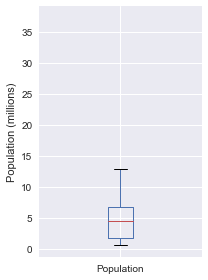

In [118]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

### Frequency tables and Histograms

Appliable to discrete variables

A __frequency table__ divides up the variable range into equally spaced segments.

`pandas.cut` creates a series that maps the values into the segments. Using `value_counts` we get:
    

In [121]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64


A __histogram__ is a way to visualize a frequency table. Use `DataFrame.plot.hist`for it, and the keyword argument `bins` to define the number of bins.

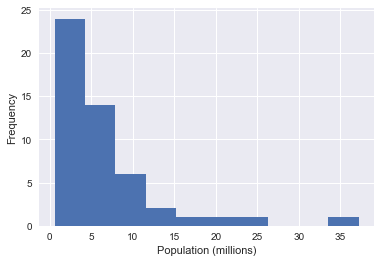

In [131]:
ax = (state['Population'] / 1_000_000).plot.hist()
ax.set_xlabel('Population (millions)');



> In  statistical  theory,  location  and  variability  are  referred  to  as  the first  and  second  moments  of  a  distribution.  The  third  and  fourth moments   are   called   skewness   and   kurtosis.   Skewness   refers   to whether the data is skewed to larger or smaller values, and kurtosis indicates the propensity of the data to have extreme values.

(array([ 91.,  91., 101., 101.,  94.,  84., 119.,  95.,  99., 125.]),
 array([-199.99927435, -140.06108773,  -80.1229011 ,  -20.18471447,
          39.75347216,   99.69165879,  159.62984542,  219.56803205,
         279.50621868,  339.44440531,  399.38259194]),
 <a list of 10 Patch objects>)

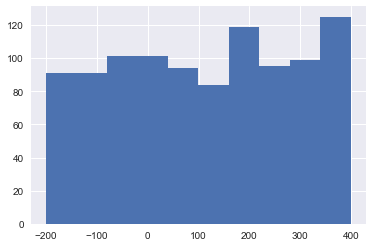

In [15]:
n = 1000
xs = np.random.uniform(-200, 400, size = n)
plt.hist(xs)

### Density plots and Estimates

Related is the __density plot__ , which shows the distribution of data values as a continuous line. 

Pandas provide the density method to create a density plot. Use the argument `bw_method` to control the smooothness of the density curve.

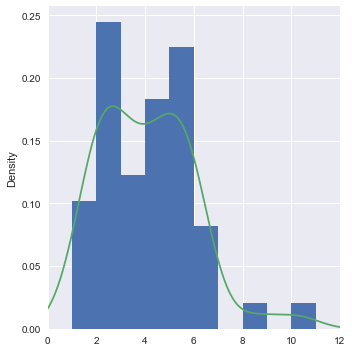

In [152]:
ax = state['Murder.Rate'].plot.hist(density = True, xlim = [0, 12], bins = range(1,12), figsize = (5,5))
state['Murder.Rate'].plot.density(ax = ax)
#Plot  functions  often  take  an  optional  axis  (ax)  argument,  which  will  cause  theplot to be added to the same graph.
plt.tight_layout()
plt.show()

__More examples__

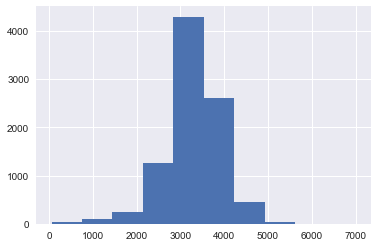

In [164]:
plt.hist(birth['birthwgt_g']);

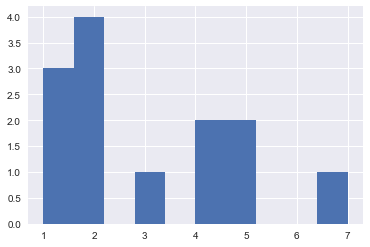

In [167]:
plt.hist([1, 2, 4, 4, 5, 5, 3, 2, 1, 7, 1, 2 ,2]);

Retrieving the mean and median from previous example:

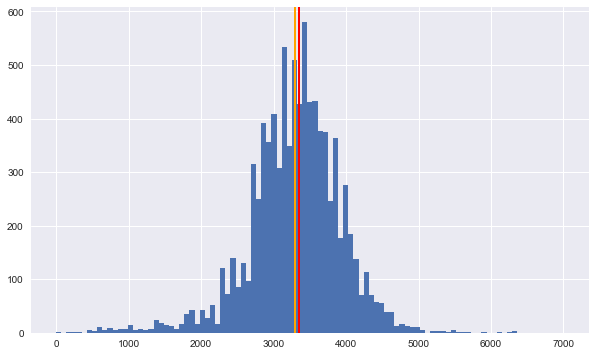

In [211]:
plt.figure(figsize=(10,6))


plt.hist(birth['birthwgt_g'], bins = np.linspace(0, 7000, 100));

plt.axvline(birth['birthwgt_g'].mean(), color = 'orange', linewidth = 2)
plt.axvline(birth['birthwgt_g'].median(), color = 'red', linewidth = 2)




## Binary and Categorical Data

In [31]:
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv"

dfw = pd.read_csv(url, index_col = [3])

dfw.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
American,8.153226,1.971774,0.762097
American,5.959924,3.706107,1.585878
American,7.157270,2.706231,2.026706
American,12.100000,11.033333,0.000000
American,7.333333,3.365591,1.774194


### Bar plot

Bar plots or bar charts, are a common visual tool for displaying a single categorical variable.



To show the airport delays per year by cause for Dallas/Fort Worth:

In [ ]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Note that in a bar chart the x-axis represents different categories, while in a histogram represents values of a single variable on a numeric scale. Pie charts are an alternative to bar charts, although statisticians and data experts eschew them because they are less visually informative.

> Converting  numeric  data  to  categorical data  is  an  important  and  widely  used  step  in  data  analysis  since  itreduces  the  complexity  (and  size)  of  the  data.  This  aids  in  the  dis‐covery  of  relationships  between  features,  particularly  at  the  initialstages of an analysis

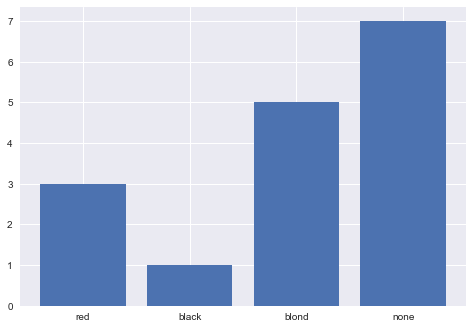

In [54]:
plt.bar(range(4), [3, 1, 5, 7])
plt.xticks(range(4), labels = ['red', 'black', 'blond', 'none']);

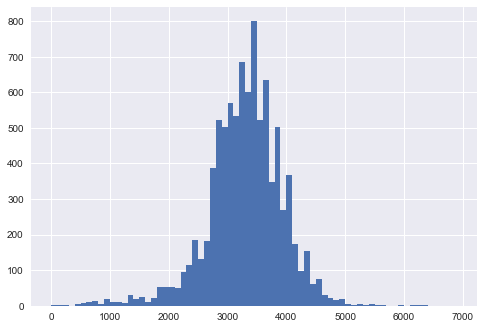

In [58]:
plt.hist(birth['birthwgt_g'], bins = range(0 , 7000, 100));

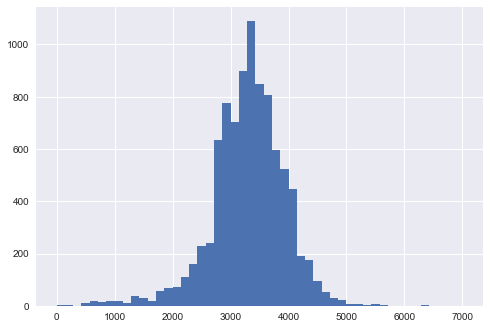

In [60]:
plt.hist(birth['birthwgt_g'], bins = np.linspace(0, 7000, 50));

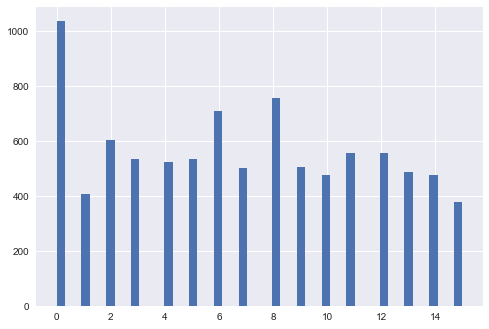

In [61]:
plt.hist(birth['birthwgt_oz'], bins = np.linspace(0, 15, 50));

In [59]:
np.array(range(0, 7000, 100))

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400,
       5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500,
       6600, 6700, 6800, 6900])

### Expected value

- Multiply each outcome by its probability of ocurrence
- Sum these values

The expected value is in fact a form of weighted mean.

## Correlation

 Variables X and Y (each with measured data) are said to be posi‐tively correlated if high values of X go with high values of Y, and low values of X gowith  low  values  of  Y.  If  high  values  of  X  go  with  low  values  of  Y,  and  vice  versa,  the variables are negatively correlated.

### Pearson's correlation coefficient

Gives an estimate of the correlation between two variables that always lies on the same scale. To do so, we multiply deviations from the mean for variable 1 times those for variable 2, and divide by the product of the standard deviations:

$$ r = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{(n-1)s_xs_y} $$

It always lies between +1 (perfect positive correlation) and -1 (perfect negative correlation), otherwise 0 shows no correlation.

Like the mean and std, the corr. coefficient is sensitive to outliers

The variables might have an association that is not linear, so the correlation coefficient may not be a useful metric.



![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [64]:
n = 1000
xs = np.random.uniform(-200, 400, size = n)
ys = 4*xs + 300 + np.random.randn(n) * 100




`stats,pearsonr(x,y)` returns (r,p-value)

In [65]:
stats.pearsonr(xs, ys)

(0.9889019769233796, 0.0)

In [66]:
np.corrcoef(xs,ys)

array([[1.        , 0.98890198],
       [0.98890198, 1.        ]])

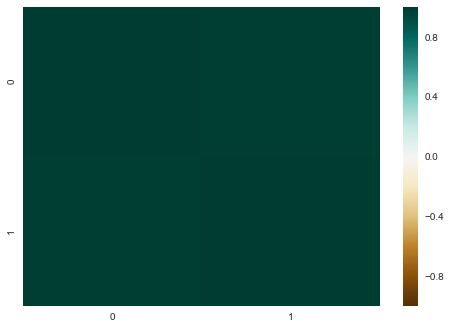

In [70]:
sns.heatmap(np.corrcoef(xs,ys), vmin = -1, vmax=1, cmap = 'BrBG')
#Important the interval [-1,1] and the colors map plotted matplotlib


In [72]:
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2

ys1 = x_1*xs + x_0
ys2 = x_2*xs**2 + x_1*xs + x_0
ys3 = x_3*xs**3 + x_2*xs**2 + x_1*xs + x_0

In [73]:
all_vars = np.array([xs, ys1, ys2, ys3])

In [75]:
np.corrcoef(all_vars)

array([[1.        , 1.        , 0.79057751, 0.84557377],
       [1.        , 1.        , 0.79057751, 0.84557377],
       [0.79057751, 0.79057751, 1.        , 0.96191281],
       [0.84557377, 0.84557377, 0.96191281, 1.        ]])

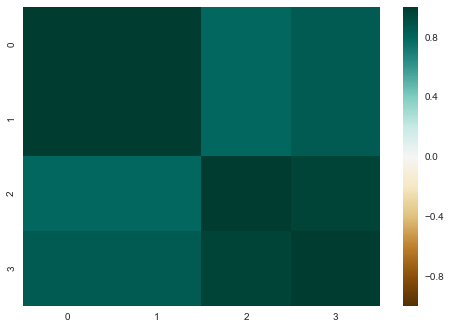

In [76]:
sns.heatmap(np.corrcoef(all_vars), vmin = -1, vmax=1, cmap = 'BrBG')

__Other data__

In [22]:
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_sectors.csv'
url2 = '../Downloads/sp500_data.csv'
sp500_sym = pd.read_csv(url)
sp500_px = pd.read_csv(url2, index_col = 0)

In [35]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
2012-07-10 -0.222436 -0.190559 -0.031502 -0.175133 -0.619999
2012-07-11 -0.136883  0.356260  0.039377  0.140106 -0.030001
2012-07-12 -0.145439  0.265126 -0.007875  0.017510  0.080000
2012-07-13  0.359315  0.546823 -0.094506  0.420316  0.190001
2012-07-16  0.171101  0.356264  0.015751  0.131350  0.100000
2012-07-17  0.410648  0.497111  0.000000  0.227670 -0.339998
2012-07-18  0.384980 -0.795379 -0.031502  0.394047  0.930001
2012-07-19 -0.316539  0.546823 -0.118132 -0.446585 -0.129999
2012-07-20 -0.042775 -0.082854  0.007875  0.297725 -0.149999
2012-07-23  0.325097 -0.091138 -0.023626  0.122592  0.129999
2012-07-24 -0.710076 -0.

We will focus on funds traded on major exchanges (ETFs)

In [39]:
etfs = sp500_px.loc[sp500_px.index > "2012-07-01", sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The seaborn package provides a convenient implementation for heatmaps.

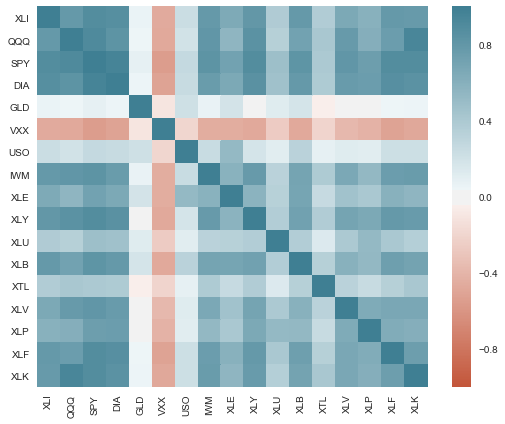

In [51]:
fig, ax = plt.subplots(figsize=(7.5,6))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()



The above heatmap works when you have color. For the greyscale images we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.


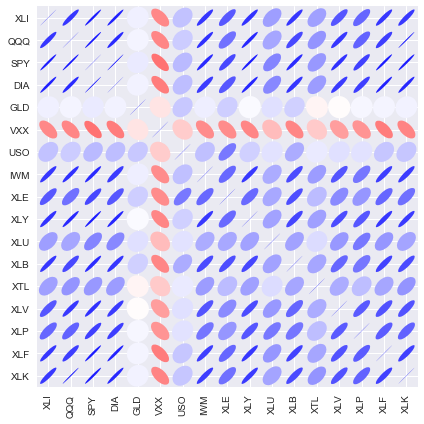

In [53]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize = None, **kwargs):
    M = np.array(data)
    if not M.dim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize = figsize, subplot_kw = {'aspect' : 'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()
        
    #xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()
        
    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                        norm=Normalize(vmin=-1, vmax=1),
                        transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collections(ec)
        
        
    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
            
    return ec



from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(7.5, 6), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()




The orientation of the ellipse indicates whether two variables are  positively  correlated  (ellipse  is  pointed  to  the  top  right)  or  negatively  correlated (ellipse  is  pointed  to  the  top  left).  The  shading  and  width  of  the  ellipse  indicate  the strength  of  the  association:  thinner  and  darker  ellipses  correspond  to  stronger relationships.

 > Like the mean and std, the corr. coefficient is sensitive to outliers. So there are other coefficients more robust in those cases (Spearman's rho or Kendall's tau). These  are  correla‐tion  coefficients  based  on  the  rank  of  the  data.  Since  they  workwith ranks rather than values, these estimates are robust to outliersand can handle certain types of nonlinearities. However, data scien‐tists  can  generally  stick  to  Pearson’s  correlation  coefficient,  and  itsrobust  alternatives,  for  exploratory  analysis.  The  appeal  of  rank-based estimates is mostly for smaller data sets and specific hypothe‐sis tests



### Spearman's correlation coefficient

When we do not know the distribution of the variables, we must use nonparametric rank correlation methods. 

Rank correlation refers to methods that quantify the association between variables using the ordinal relationship between the values rather than the specific values. This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).

The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.

$$ \mathrm{Spearman's\hspace{1mm} coeff} = \rho $$ use `spearmanr()`

In [79]:
stats.spearmanr(xs, ys)

SpearmanrResult(correlation=0.9895639615639616, pvalue=0.0)

In [80]:
stats.pearsonr(xs, ys)

(0.9889019769233796, 0.0)

In [82]:
stats.pearsonr(xs, ys3), stats.spearmanr(xs, ys3)

((0.8455737675512561, 2.7946756277285e-274),
 SpearmanrResult(correlation=0.9999947319947321, pvalue=0.0))

In [98]:
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
from scipy.stats import spearmanr
from scipy.stats import pearsonr

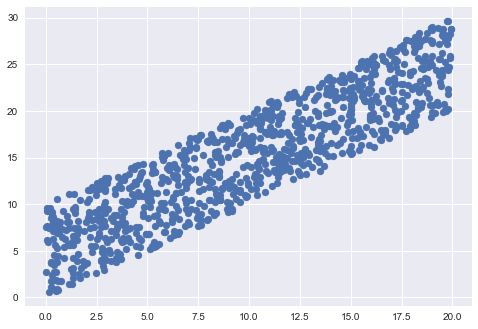

In [92]:
seed(1)

data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)

pyplot.scatter(data1, data2)
pyplot.show()


We know that there is a strong association between the variables in the dataset and we would expect the Spearman’s test to find this association.



In [97]:
coef, p = spearmanr(data1,data2)
print("Spearman's correlation coefficient: %f" %coef )
alpha = 0.05
if p > alpha:
    print("Samples are uncorrelated (fail to reject H0) p=%f" %p)
else:
    print("Samples are correlated (reject H0) p=%f" %p)

Spearman's correlation coefficient: 0.900004
Samples are correlated (reject H0) p=0.000000


The statistical test reports a strong positive correlation with a value of 0.9. The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely (e.g. 95% confidence) and that we can reject the null hypothesis that the samples are uncorrelated.

In [99]:
pearsonr(data1,data2)

(0.8941424273095472, 0.0)

### Scatter plot

The standard way to visualize the relationship between two measured data variables is with a scatterplot. 

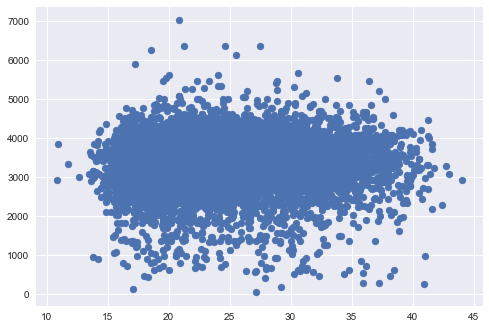

In [100]:
plt.scatter(birth['agepreg'], birth['birthwgt_g']);

It is no possible to extract some insight from this. The density doesn't allow to see further

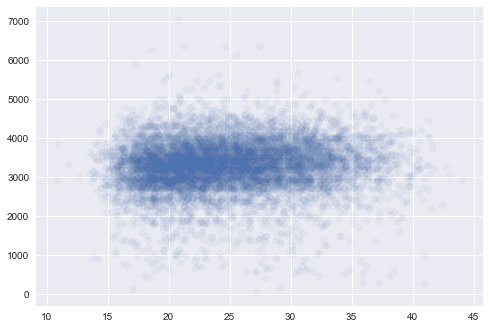

In [105]:
plt.scatter(birth['agepreg'], birth['birthwgt_g'], alpha = .05);
#alpha is the opacity

Simple scatterplots are also supported by pandas. 

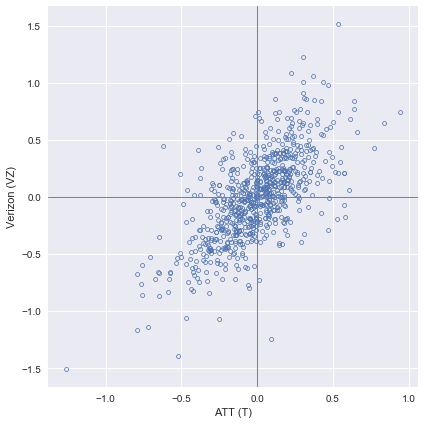

In [117]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(6, 6), marker='$\u25EF$')
#$\u25EF$ is the open circle for each point
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

#This shows the correlation between the daily returns for ATT and Verizon

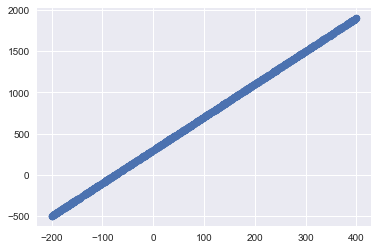

In [16]:
n = 1000
xs = np.random.uniform(-200, 400, size=n)
ys = 4 * xs + 300
plt.scatter(xs, ys)

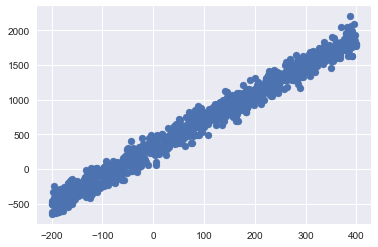

In [17]:
ys = 4 * xs + 300 + np.random.randn(n) * 100
plt.scatter(xs, ys)

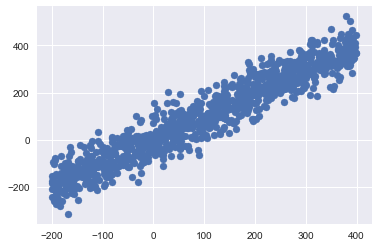

In [22]:
def jitter(series, noise_factor = 0.2):
    return series + np.random.randn(series.size) * noise_factor * (series.mean() + series.std())
plt.scatter(xs,jitter(xs))

__Quick exercise__

Make three series ys1, ys2, ys3 that have a linear, quadratic and cubic relationship to xs.

The coefficients should be:

```python
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2
```

In [24]:
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2

ys1 = jitter(x_0 + x_1 * xs)
ys2 = jitter(x_0 + x_1 * xs + x_2 * xs ** 2)
ys3 = jitter(x_0 + x_1 * xs + x_2 * xs ** 2 + x_3 + xs ** 3)


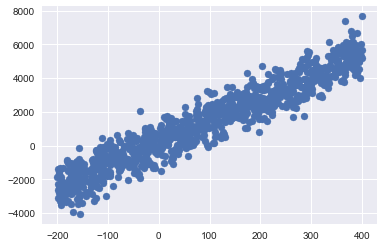

In [28]:
plt.scatter(xs, ys1)

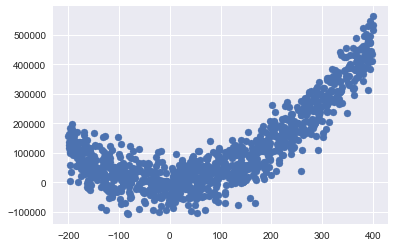

In [30]:
plt.scatter(xs, ys2)

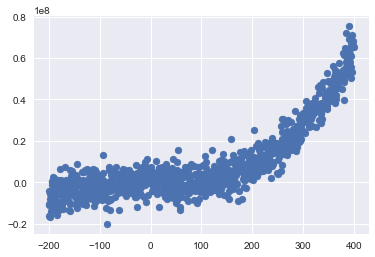

In [31]:
plt.scatter(xs, ys3)

## Covariance

The covariance measures the relationship between two or more variables. It is a measure of how much two variables change together. 



$$s_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n-1}$$

It is a dot product, so the covariance is maximized if the two vectors are identical, 0 if they are orthogonal. Relationships between variables negative if they point in opposite directions.

While correlation was enclosed between [-1, 1], the covariance scale depends on the scale of the variables.

The covariance matrix consists of the individual variable variances ($s_x²$ y $s_y²$) on the diagonal and the covariances between variable pairs on the off-diagonal.

$$\begin{bmatrix}{s_x²}&{s_{x,y}}\\{s_{y,x}}&{s_y²}\end{bmatrix}$$

### Z-score

When we are not interested in how much but instead in how different from the average, the z-score puts all the variables on similar scales by substracting the mean and dividing by the standard deviation (standard deviations away from the mean).



$$z_i = \frac{x_i - \bar{x}}{\sigma}$$

Calculate the z-scores of every `birthweight_g` and plot them like we have just done.

In [5]:
birth['birthwgt_g'].head()

0    4000.55
1    3574.90
2    4142.70
3    3178.00
4    2809.05
Name: birthwgt_g, dtype: float64

/home/dsc/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dsc/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.800e+01, 9.500e+01, 2.440e+02, 1.257e+03, 4.295e+03, 2.604e+03,
        4.580e+02, 3.700e+01, 6.000e+00, 4.000e+00]),
 array([-5.07030559, -3.98299789, -2.8956902 , -1.8083825 , -0.7210748 ,
         0.3662329 ,  1.4535406 ,  2.54084829,  3.62815599,  4.71546369,
         5.80277139]),
 <a list of 10 Patch objects>)

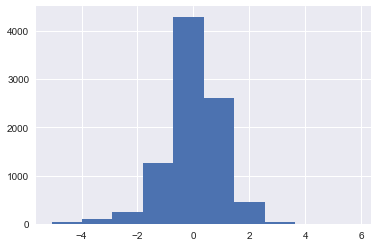

In [13]:
zscore = (birth['birthwgt_g'] - birth['birthwgt_g'].mean()) / birth['birthwgt_g'].std()

plt.hist(zscore)

## Two or more variables

Mean and variance look variables one at a time(i.e. univariate analysis). Correlation does bivariate analysis. There are more estimates to look at more than two variables (multivariate analysis).

The appropiate analysis depends on the nature of the data: numeric vs. categorical.


Consider the data set kc_tax,which  contains  the  tax-assessed  values  for  residential  properties  in  King  County,Washington. In order to focus on the main part of the data, we strip out very expen‐sive and very small or large residences.

In [121]:
url3 = "../Downloads/kc_tax.csv.gz"
kc_tax = pd.read_csv(url3)
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


Filter based on a variety criteria

In [123]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


### Hexagonal binning and Contours

When the data is too large, the __hexagonal binning__ plot is a better option for visualizing relationships. The `hexbin` method for pandas data frames is one powerful approach.


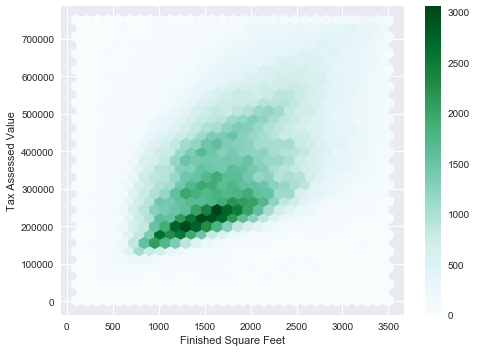

In [126]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y = 'TaxAssessedValue',
                         gridsize = 30, sharex = False, figsize = (7,5))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

The  positive  relationship  between  square  feet  and tax-assessed value is clear. An interesting feature is the hint of additional bands abovethe  main  (darkest)  band  at  the  bottom,  indicating  homes  that  have  the  same  squarefootage as those in the main band but a higher tax-assessed value.

The seaborn `kdeplot` creates a contour plot, a 2D extension of the density plot.

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### Two Categorical Variables

A useful way to summarize two categorical variables is a contingency table—a table ofcounts by category. Contingency tables can look only at counts, or they can also include column and total percentages.

The  pivot_table  method  creates  the  pivot  table  in  Python.  The  aggfunc  argumentallows us to get the counts.

In [135]:
url4 = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/lc_loans.csv"

lc_loans = pd.read_csv(url4)
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [136]:
crosstab = lc_loans.pivot_table(index = 'grade', columns = 'status',
                                aggfunc=lambda x: len(x), margins = True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


### Categorical and Numeric Data

__Boxplots__ are  a  simple  way  to  visually compare  the  distributions  of  a  numeric  variable  grouped  according  to  a  categorical variable. 

For example, we might want to compare how the percentage of flight delays varies  across  airlines.

In [139]:
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv"

dfw = pd.read_csv(url)

dfw.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


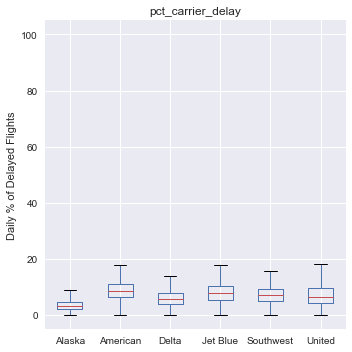

In [141]:
ax = dfw.boxplot(by='airline', column = 'pct_carrier_delay', figsize = (5,5))

ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

__Violin plot__ in an enhancement to the boxplot and plots the density estimate with the density on the y-axis. The  advantage  of  a  violin  plot  is  that  it  can  show  nuances  in  the  distribution that  aren’t  perceptible  in  a  boxplot. `violinplot`


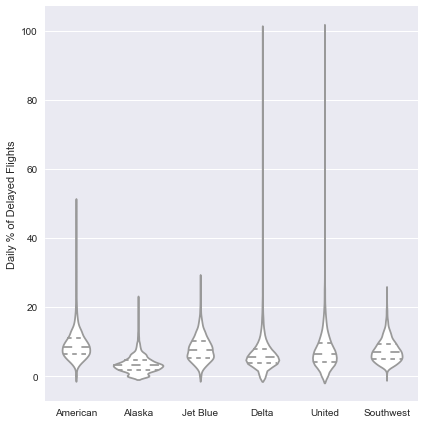

In [144]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.violinplot(dfw.airline, dfw.pct_carrier_delay,
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### Multiple Variables

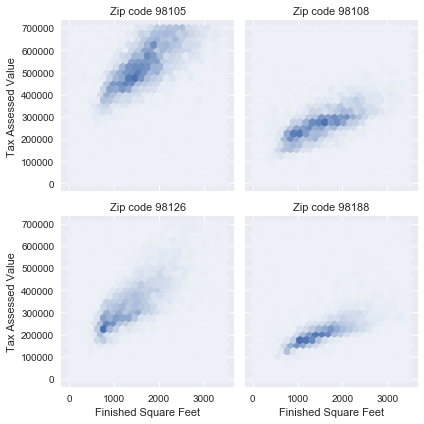

In [145]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

## Probability

Let's play with a coin

In [86]:
import random

n = 1000
p = .5
#random.random() > p
heads = sum([random.random() > p for _ in range(n)])
heads

498

In [87]:
observations = 350
results = []

for _ in range(observations):
    results.append(sum([random.random() > p for _ in range(n)]))
results



[495,
 478,
 508,
 510,
 495,
 525,
 483,
 501,
 482,
 469,
 518,
 491,
 486,
 519,
 490,
 501,
 491,
 493,
 497,
 491,
 520,
 503,
 501,
 486,
 494,
 500,
 512,
 514,
 483,
 508,
 497,
 496,
 496,
 498,
 520,
 514,
 504,
 505,
 492,
 510,
 528,
 522,
 489,
 533,
 497,
 495,
 508,
 514,
 517,
 518,
 519,
 508,
 515,
 524,
 512,
 507,
 538,
 468,
 512,
 506,
 484,
 493,
 498,
 523,
 515,
 500,
 490,
 492,
 491,
 489,
 483,
 492,
 503,
 504,
 500,
 477,
 513,
 494,
 500,
 503,
 480,
 493,
 493,
 470,
 513,
 488,
 501,
 508,
 514,
 500,
 497,
 520,
 479,
 495,
 481,
 487,
 518,
 514,
 477,
 477,
 535,
 522,
 472,
 509,
 480,
 506,
 516,
 485,
 497,
 491,
 512,
 506,
 491,
 507,
 482,
 484,
 507,
 480,
 474,
 491,
 498,
 485,
 512,
 508,
 498,
 511,
 503,
 483,
 466,
 518,
 489,
 481,
 523,
 468,
 493,
 508,
 543,
 486,
 489,
 532,
 501,
 512,
 490,
 501,
 479,
 477,
 498,
 495,
 501,
 483,
 486,
 507,
 518,
 483,
 493,
 515,
 482,
 485,
 506,
 486,
 523,
 515,
 504,
 507,
 522,
 489,
 494

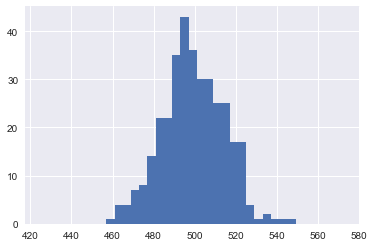

In [92]:
plt.hist(results, bins = range(425, 575, 4));

Now with numpy

In [115]:
np.random.binomial(n,p, size=350)

array([498, 501, 514, 509, 519, 504, 495, 511, 504, 508, 481, 497, 503,
       500, 507, 501, 482, 498, 483, 489, 460, 526, 507, 505, 497, 477,
       489, 490, 478, 504, 496, 486, 485, 498, 486, 524, 529, 506, 512,
       499, 487, 488, 478, 493, 505, 492, 487, 493, 469, 472, 498, 494,
       511, 488, 499, 494, 497, 501, 500, 508, 486, 467, 495, 506, 513,
       488, 523, 523, 494, 502, 491, 520, 527, 470, 498, 515, 515, 525,
       517, 500, 495, 521, 487, 499, 465, 512, 481, 503, 500, 466, 497,
       493, 507, 488, 474, 502, 498, 493, 529, 507, 482, 509, 482, 494,
       528, 511, 495, 495, 478, 536, 473, 496, 490, 486, 497, 494, 525,
       526, 520, 496, 507, 518, 509, 526, 518, 487, 479, 491, 511, 495,
       510, 455, 516, 507, 519, 517, 482, 495, 495, 479, 496, 497, 501,
       516, 490, 483, 506, 489, 517, 511, 488, 511, 529, 486, 532, 515,
       501, 513, 502, 477, 511, 500, 473, 494, 493, 502, 495, 496, 508,
       504, 492, 506, 487, 491, 513, 482, 492, 499, 500, 509, 48

(array([ 2.,  0., 13.,  0.,  0., 57.,  0., 91.,  0., 87.]),
 array([ 6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. ]),
 <a list of 10 Patch objects>)

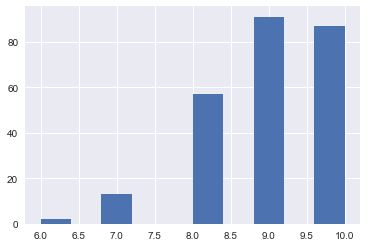

In [99]:
n = 10
p = .9
size = 300

tries = np.random.binomial(n, p, size = 250)
plt.hist(tries)

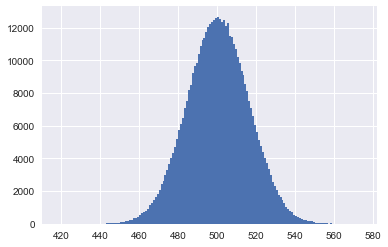

In [98]:
n = 1000
p = .5
size = 500000
tries = np.random.binomial(n, p, size=size)
plt.hist(tries, bins = range(tries.min(), tries.max()));

#### Exercise

The p-value is a widely used (and criticized) measure of how surprising an observation is under a given set of assumptions.

It is defined as "the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct" [1](https://en.wikipedia.org/wiki/P-value).

Let's play with a lot of coins. Calculate experimentally the p-value of getting 120 heads when launching 1000 heavily weighted coinds, each with a $p_{heads}=0.1$.


In [113]:
n = 1000
p=.1

tries = np.random.binomial(n, p, size = 10000)

(tries >= 120).mean()


0.021

Another way

In [114]:
unique, counts = np.unique(tries, return_counts = True)
unique, counts

(array([ 65,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 135, 137]),
 array([  1,   1,   2,   3,   1,   7,   2,   9,  14,  11,  11,  22,  32,
         38,  50,  81,  87,  89, 126, 140, 150, 219, 211, 240, 274, 324,
        299, 329, 379, 405, 381, 383, 415, 458, 442, 397, 403, 379, 392,
        340, 341, 277, 299, 239, 211, 184, 174, 124, 115,  87,  78,  63,
         51,  57,  27,  28,  23,  19,  13,  14,   7,   5,   6,   1,   5,
          1,   2,   1,   1]))

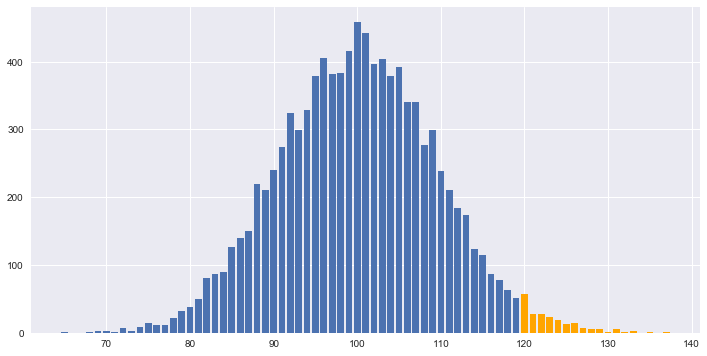

In [115]:
good = unique >= 120
plt.bar(unique[~good], counts[~good])
plt.bar(unique[good], counts[good], color = 'orange')
plt.gcf().set_size_inches(12, 6)


### Intersection

In [116]:
n = 1000
p = .5

left = np.random.uniform(size=1000) < p
right = np.random.uniform(size=1000) > p
left.mean(), right.mean()

(0.488, 0.516)

In [117]:
(left & right).sum()

255

Let's play with loaded coins

In [118]:
n = 10000
p = .3

left = np.random.uniform(size=1000) < p
right = np.random.uniform(size=1000) < p
left.mean(), right.mean(), (left & right).mean(), left.mean() * right.mean()

(0.294, 0.323, 0.102, 0.09496199999999999)

### Union

In [121]:
n = 1000
p = .5

left = np.random.uniform(size=1000) < p
right = np.random.uniform(size=1000) < p
left.mean(), right.mean(), (left & right).mean() , (left | right).mean()

(0.496, 0.488, 0.248, 0.736)

In [123]:
#The union can also be calculaled from:

print(left.mean() + right.mean() - (left & right).mean())

0.736


### Conditioned Probability


$$P(A\mid B) = \frac{P(A\cap B)}{P(B)}$$


### Independent events

Definition:

$$P(A\mid B) = P(A)$$

Properties:

$$P(A \cap B) = P(A) \cdot P(B)$$

$$P(A \mid B) = P(A)$$

$$P(B \mid A) = P(B)$$

### Law of total probability

$$P(S) = \sum_{i=1}^n P(S \mid S_i)P(S_i)$$

### Bayes theorem

$$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$$

## Random variable


https://docs.scipy.org/doc/scipy/reference/stats.html

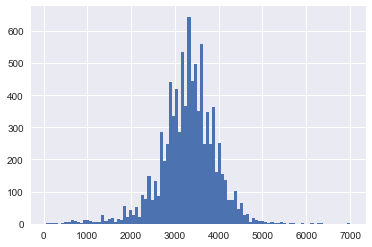

In [129]:
plt.hist(birth['birthwgt_g'], bins = np.linspace(birth['birthwgt_g'].min(), birth['birthwgt_g'].max(), 100)); 

## Discrete and continuous variables

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete

### Discrete variables



<BarContainer object of 19 artists>

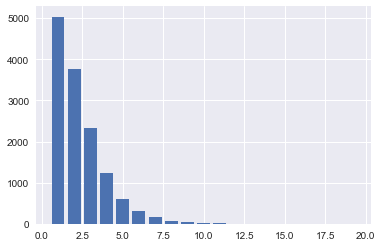

In [130]:
xs, ys = np.unique(birth['pregordr'], return_counts=True)
xs, ys
plt.bar(xs, ys)

<BarContainer object of 19 artists>

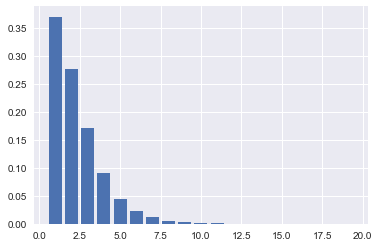

In [131]:
plt.bar(xs, ys/ys.sum())

### Binomial Distribution

In [132]:
n = 8
p = .5
binom = stats.binom(n, p)

### Generating random observations

In [133]:
binom.rvs(44543)

array([5, 6, 4, ..., 2, 4, 4])

#### Pmf

Probability Mass Function

In [149]:
binom.pmf(4)

0.27343750000000017

In [141]:
binom.pmf(2)

0.10937500000000006

__Exercise__

What is the probability of getting 3 or fewer heads when tossing 8 times a fair coin?

In [142]:
n = 8
p = .5
binom = stats.binom(n,p)

sum(binom.pmf(range(4)))
#binom.pmf(range(4)).sum()



0.3632812500000002

In [150]:
binom.pmf(range(4)).sum()


0.3632812500000002

<BarContainer object of 9 artists>

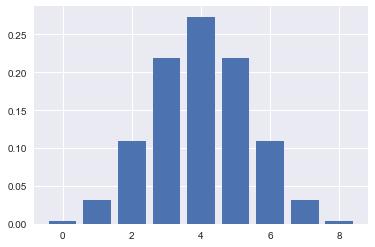

In [151]:
xs = range(n + 1)
ys = binom.pmf(xs)

plt.bar(xs,ys)

#### Cdf

Cumulative Distribution Function

<BarContainer object of 9 artists>

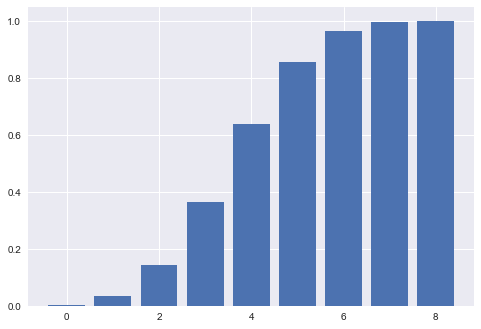

In [132]:
xs = range(n + 1)
ys = binom.cdf(xs)

plt.bar(xs,ys)

### Poisson

### Continuous distributions



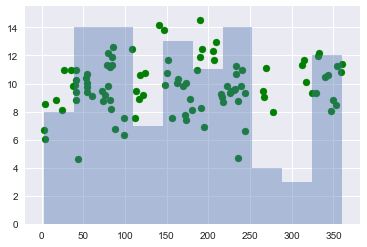

In [164]:
left, right = 0, 360
n = 100
uniform = stats.uniform(left, right - left)
rs = uniform.rvs(size = n)
rs

plt.hist(rs, alpha=.4)
irrelevant = jitter(np.repeat(n / 10, rs.size))
plt.scatter(rs, irrelevant, color = 'green')

What is the probabilty of `uniform` being exactly 10?

In [166]:
left, right = 0, 360
n = 1000
uniform = stats.uniform(left, right - left)
rs = uniform.rvs(size = n)
rs

(rs == 10).sum()

0

#### Pdf


Probability Density Function

In [167]:
uniform.pdf(0)

0.002777777777777778

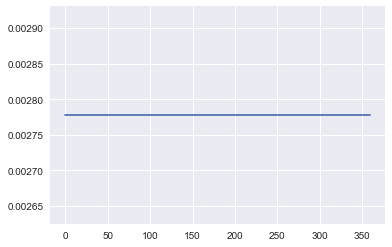

In [176]:
plt.plot(range(360), uniform.pdf(range(360)));

In [169]:
uniform.pdf(range(360)).sum()

1.0

In [177]:
uniform.pdf(np.linspace(0, 360, 1000)).sum()

2.777777777777777

In [178]:
uniform.cdf(20)

0.05555555555555555

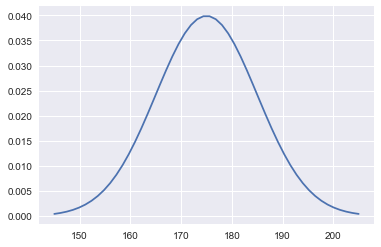

In [179]:
normal = stats.norm(175, 10)
xs = np.linspace(145, 205)

plt.plot(xs, normal.pdf(xs))

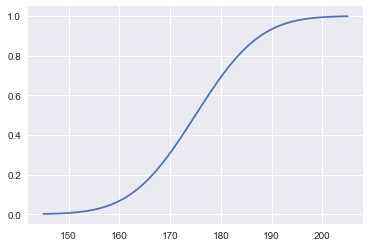

In [180]:
plt.plot(xs, normal.cdf(xs))

In [183]:
#height fewer than 172 cm
normal.cdf(172)

0.3820885778110474

#### Exercise

What is the probability of `uniform` taking a value between 10 and 15?

In [184]:
uniform.pdf(range(10,15)).sum()

0.01388888888888889

In [185]:
normal.pdf(range(165,185)).sum() #we can do this bc the difference between heights is 1, ( it isn't a continue variable)

0.6822860730719402

In [189]:
normal.cdf(187)-normal.cdf(163)

0.7698606595565836

### Normal

#### Exercise

Approximate the shaded area below the curve using `normal.pdf(xs)`

#### Checking normality

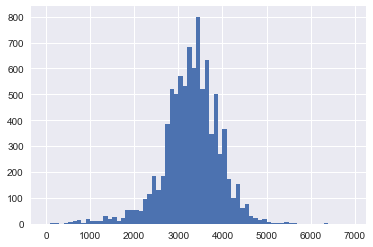

In [190]:
plt.hist(birth['birthwgt_g'], bins = range (0, 7000, 100));

In [191]:
birth['birthwgt_g'].mean(), birth['birthwgt_g'].std()


(3298.4223722062566, 639.3544362389737)

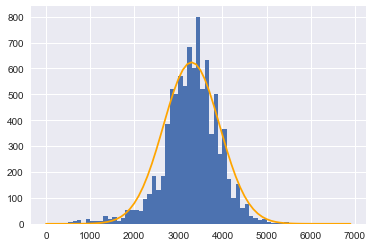

In [199]:
norm_like_weight = stats.norm(birth['birthwgt_g'].mean(), birth['birthwgt_g'].std())


plt.hist(birth['birthwgt_g'], bins = range (0, 7000, 100));
plt.plot(range(0,7000, 100), norm_like_weight.pdf(np.arange(0, 7000, 100))*1e6, color = 'orange')

In [202]:
sm.qqplot(birth['birthwgt_g'].dropna(), norm_like_weight, line='45')
plt.gcf().set_size_inches(7,6)

<Figure size 504x432 with 0 Axes>

### The central limit theorem

<BarContainer object of 7 artists>

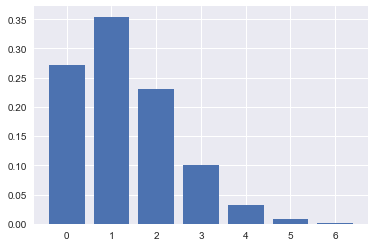

In [208]:
rate = 1.3

poisson = stats.poisson(rate)

xs = range(7)
plt.bar(xs, poisson.pmf(xs))

In [209]:
size = 1000
rs = poisson.rvs(size)
rs.mean()


1.323

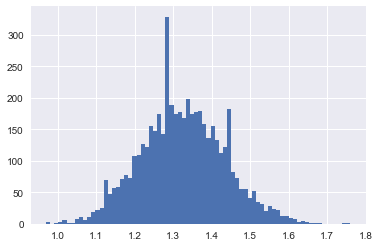

In [216]:
means = np.array([np.random.choice(rs, size = 100).mean() for _ in range(5000)])
plt.hist(means, bins = np.linspace(means.min(), means.max(), 75));